# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="0042-SMB"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [11]:
# Part 1
import numpy as np

# define prob matrix
p_matr = np.matrix([[0.3, 0.4, 0.3],
                   [0.2, 0.5, 0.3],
                   [0.4, 0.3, 0.3]])

p_matr_2 = np.linalg.matrix_power(p_matr, 2)

problem1_p1 = p_matr_2[1, 0]
print(problem1_p1)

# Fill in the answer to part 1 below
problem1_p1 = '0.28'


0.28


In [7]:
# Part 2
import numpy as np

# 计算各个条件概率
p_suburbs_downtown = p_matr[1, 0]  # 郊区 -> 市中心
p_suburbs_suburbs = p_matr[1, 1]   # 郊区 -> 郊区
p_suburbs_countryside = p_matr[1, 2]  # 郊区 -> 乡村
p_countryside_downtown = p_matr[2, 0]  # 乡村 -> 市中心


# 第2步从非市中心到市中心的概率
problem1_p2 = (p_suburbs_suburbs * p_suburbs_downtown + 
                        p_suburbs_countryside * p_countryside_downtown)

# 两步后首次到市中心的概率
print(problem1_p2)

# Fill in the answer to part 2 below
problem1_p2 = '0.22'

0.22


In [15]:
# Part 3
import networkx as nx
# 如果转移矩阵有效，构建有向图
    # 1. 构建有向图
G = nx.DiGraph()
    
    # 添加边和权重
for i in range(p_matr.shape[0]):
     for j in range(p_matr.shape[1]):
        if p_matr[i, j] > 0:  # 仅添加非零权重的边
            G.add_edge(i, j, weight=p_matr[i, j])
# 2. 检查不可约性
is_irreducible = nx.is_strongly_connected(G)
print("Is the Markov chain irreducible?", is_irreducible)
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

Is the Markov chain irreducible? True



## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [16]:
# 4. 平稳分布 (stationary distribution)
from scipy.linalg import eig
w, v = eig(p_matr, left=True, right=False)
stationary = np.real(v[:, np.isclose(w, 1)])
stationary = stationary / stationary.sum()
print("Stationary distribution:", stationary.ravel())

Stationary distribution: [0.28888889 0.41111111 0.3       ]


In [5]:
# Part 4

# Fill in the answer to part 4 below

def get_stationary_distribution(transition_matrix):

    # transpose the matrix
    transition_matrix_t = transition_matrix.T
    # use linear algebra module of numpy to compute the eigenvalues
    eigenvals, eigenvects = np.linalg.eig(transition_matrix_t)

    # Find the indexes of the eigenvalues that are close to one.
    close_to_1_idx = np.isclose(eigenvals,1) # isclose checks element-wise if each element is close to 1 within the specific tolerance
    # Use them to select the target eigen vectors
    target_eigenvect = eigenvects[:,close_to_1_idx]
    #Flatten
    target_eigenvect = target_eigenvect[:,0]
    # Turn the eigenvector elements into probabilities
    # that would be the stationary distribution
    st_d = target_eigenvect / sum(target_eigenvect) 
    
    real_st_distr = st_d.real
    
    ## check
    if st_d.real.sum() != 1:
        raise Exception("The probabilities don't sum to 1!")
        
    return real_st_distr
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = get_stationary_distribution(p_matr)
problem1_stationary

matrix([[0.28888889],
        [0.41111111],
        [0.3       ]])

In [21]:
# Part 5
import numpy as np


def probability_at_time(P, initial_state, target_state, steps):
    """
    计算从初始状态 `initial_state` 出发，在经过 `steps` 次转移后，
    到达目标状态 `target_state` 的概率。
    state都是从0开始的索引
    
    参数:
    - P (ndarray): 马尔可夫链的转移矩阵。
    - initial_state (int): 初始状态的索引（从0开始）。
    - target_state (int): 目标状态的索引（从0开始）。
    - steps (int): 马尔可夫链的步数。
    
    返回:
    - float: 在 `steps` 步后到达目标状态的概率。
    """
    # 计算 P^steps
    P_steps = np.linalg.matrix_power(P, steps)
    # 返回目标状态的概率
    return P_steps[initial_state, target_state]

def calculate_first_hit_time_expectation(P, target_state):
    """
    计算从每个状态到达目标状态的期望时间。
    
    参数:
    - P: 转移矩阵 (numpy 数组)，表示每个状态之间的转移概率。
    - target_state: 目标状态的索引
    
    返回:
    - h: 期望时间向量 (numpy 数组)，其中 h[i] 表示从状态 i 到目标状态的期望时间。
    """
    n = P.shape[0]  # 状态空间的大小
    
    # 删除目标状态对应的行和列
    P_minus = np.delete(P, target_state, axis=0)  # 删除第 target_state 行
    P_minus = np.delete(P_minus, target_state, axis=1)  # 删除第 target_state 列
    
    # 计算 b 向量
    b = np.sum(P, axis=1)  # 每一行的元素加总
    b = -b  # 取负值
    b = np.delete(b, target_state)  # 删除目标状态的 b 值（不需要计算该目标状态）

    # 计算期望时间向量 h
    I = np.eye(n-1)  # (n-1)维单位矩阵
    h = np.linalg.solve(P_minus - I, b)  # 解方程 (P_minus - I) * h = b
    
    # 加入目标状态的期望时间
    h_full = np.zeros(n)
    h_full[target_state] = 0  # 目标状态的期望时间为 0
    h_full[np.delete(np.arange(n), target_state)] = h  # 填充其他状态的期望时间
    
    return h_full


# 计算从 suburbs (索引 1) 到 downtown (索引 0) 的期望时间
expectation = calculate_first_hit_time_expectation(p_matr, target_state=0)
print("期望时间：", expectation[1])  # suburbs 到 downtown 的期望时间
# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = XXX

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 2)


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [22]:

import pandas as pd

import numpy as np

from sklearn import datasets
import sklearn.linear_model as sk
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/abalone.csv", encoding='latin') 

In [23]:
problem2_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [29]:
# Part 1


# 从列名中获取所有特征列（即除了目标列 'Rings' 的其他列）
problem2_features = list(problem2_df.columns)  # 获取所有列名的列表
problem2_target = 'Rings'  # 将目标列设置为 'Rings'

problem2_features.remove('Rings')  # 从特征列表中移除目标列 'Rings'

# 输出特征和目标列的名称
print('features:', problem2_features)
print('target:', problem2_target)



features: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
target: Rings


In [30]:
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [31]:
# Part 2
from sklearn.model_selection import train_test_split


# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42


problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
def one_hot_encode(problem2_X_train, problem2_X_test):
    # 确定哪些列是分类变量（类型为 'object'）
    s = (problem2_X_train.dtypes == 'object')  # 检查数据类型是否为 'object'
    object_cols = list(s[s].index)  # 获取分类变量的列名
    object_cols  # 输出分类列名列表

    from sklearn.preprocessing import OneHotEncoder  # 导入 One-Hot 编码器

    # 对分类变量的每一列应用 One-Hot 编码
    ohe = OneHotEncoder(sparse_output=False)  # 初始化编码器，sparse_output=False 表示输出为非稀疏矩阵

    # 使用 One-Hot 编码对训练集和测试集的分类列进行转换，结果为 numpy 数组
    OH_cols_train = pd.DataFrame(ohe.fit_transform(problem2_X_train[object_cols]))
    OH_cols_test = pd.DataFrame(ohe.fit_transform(problem2_X_test[object_cols]))

    # 为 One-Hot 编码生成的列命名（每列一个独特的编码特征）
    OH_cols_train.columns = ohe.get_feature_names_out(object_cols)
    OH_cols_test.columns = ohe.get_feature_names_out(object_cols)

    # One-Hot 编码移除了原始索引，需将索引恢复为原来的
    OH_cols_train.index = problem2_X_train.index
    OH_cols_test.index = problem2_X_test.index

    # 删除原始的分类变量列（未编码的部分）
    num_X_train = problem2_X_train.drop(object_cols, axis=1)
    num_X_test = problem2_X_test.drop(object_cols, axis=1)

    # 将编码后的分类变量列与数值列重新拼接
    problem2_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    problem2_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

    return problem2_X_train, problem2_X_test  # 返回处理后的训练集和测试集


In [44]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_absolute_error  # 从 sklearn 导入 MAE 计算函数

# 使用训练好的模型 problem2_model 在测试集上进行预测
y_pred = problem2_model.predict(problem2_X_test)  # 用测试集特征 problem2_X_test 预测目标值

# 计算平均绝对误差 (MAE)
problem2_mae = mean_absolute_error(y_pred, problem2_y_test)  # 与测试集真实值 problem2_y_test 进行对比
problem2_mae  # 输出 MAE


1.593106781660834

In [47]:
len(y_pred)

836

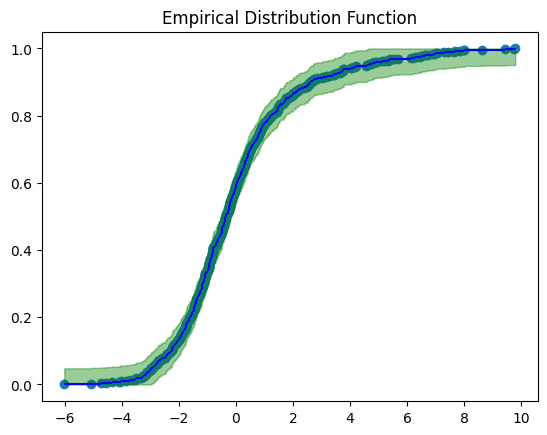

In [52]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

from Utils import makeEDF,plotEDF

res = problem2_y_test - y_pred

res_edf = makeEDF(res)#生成残差的经验分布函数

plotEDF(res_edf, confidence_band=True)#加上置信区间并画图




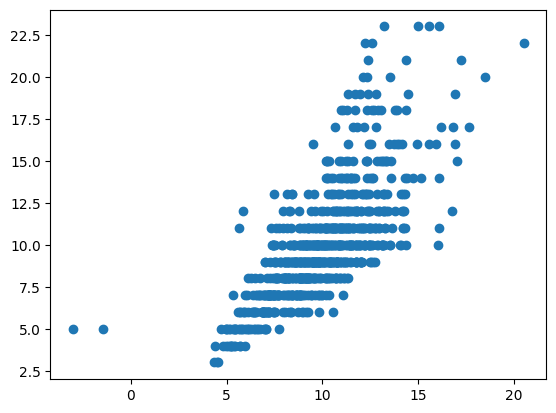

In [49]:
# Part 5

# Write the code below to produce the scatter plot for part 5
plt.scatter(y_pred, problem2_y_test)



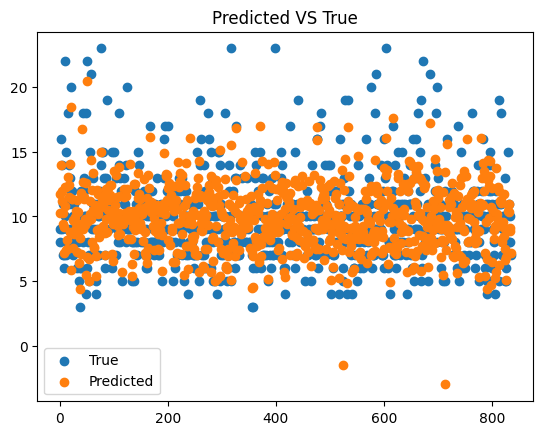

In [53]:
# 生成样本编号，用于横轴
x_vals = np.arange(0, len(y_pred))  # 创建从 0 到 len(y_pred)-1 的整数数组，表示测试集的样本编号

# 绘制真实值的散点图
plt.scatter(x_vals, problem2_y_test, label='True')  # 横轴为样本编号，纵轴为真实值，图例标记为 'True'

# 绘制预测值的散点图
plt.scatter(x_vals, y_pred, label='Predicted')  # 横轴为样本编号，纵轴为预测值，图例标记为 'Predicted'

# 设置图标题
plt.title('Predicted VS True')  # 图表标题：预测值与真实值对比

# 显示图例
plt.legend()  # 显示图例区分预测值和真实值

# 显示图形
plt.show()  # 显示绘制的散点图



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [ ]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
import pandas as pd
problem3_df = pd.read_csv("data/visits_clean.csv", sep = ' ')

problem3_df.head() # 显示数据集的前5行

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [12]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = list(problem3_df.columns)

problem3_features = list(filter(lambda x: x not in ['ofp', 'ofnp', 'opp', 'opnp', 'emr'], problem3_features))

# Fill in the target as a string with the correct column name

problem3_target = "ofp"

In [13]:
problem3_features

['hosp',
 'exclhlth',
 'poorhlth',
 'numchron',
 'adldiff',
 'noreast',
 'midwest',
 'west',
 'age',
 'male',
 'married',
 'school',
 'faminc',
 'employed',
 'privins',
 'medicaid']


## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### 1.What features are reasonable?
Features like `ofnp` (nonphysician office visits), `opp` (outpatient physician visits), `opnp` (outpatient nonphysician visits), and `emr` (emergency room visits) were excluded because they are highly correlated with `ofp` or are directly dependent on the target. Including them could introduce bias or redundancy in the model.
The features in problem3_features.

---
### 2. In regards to how much data we have, how many features do you think we should aim for?
The number of features should depend on the dataset size. A good rule of thumb is to aim for a 10-20:1 ratio of samples to features to avoid overfitting. For example, if the dataset has 1,000 samples, we should use 10-15 features.

---

### 3. What other features would you like to have used but was not collected?
Additional valuable features could include:
- Lifestyle factors**: Exercise frequency, smoking, and alcohol consumption.
- Specific health conditions**: Details on chronic diseases like diabetes or hypertension.
- Healthcare system factors**: Distance to healthcare facilities and out-of-pocket expenses.
- Social support**: Household size and access to community health programs.
These would provide a more comprehensive understanding of factors influencing physician visits.


#### Discussion


In [56]:
# Part 2

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = y = problem3_df[problem3_target]



# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train,problem3_X_test,problem3_y_train,problem3_y_test = train_test_split(problem3_X, problem3_y, test_size=0.2, random_state=42)



# enocde categorical data
problem3_X_train, problem3_X_test = one_hot_encode(problem3_X_train, problem3_X_test)

problem3_X_train

,hosp,exclhlth,poorhlth,numchron,adldiff,noreast,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
4335,1,0,1,5,1,0,0,0,8.1,1,1,6,0.662400,0,0,1
3052,0,1,0,3,0,0,1,0,7.5,0,0,4,1.059500,0,1,0
3527,0,0,0,1,0,0,1,0,7.3,1,1,7,1.564400,0,0,0
1448,0,0,0,2,0,0,1,0,6.7,0,1,8,1.200000,0,1,0
1749,0,0,0,2,0,0,1,0,7.0,1,1,12,1.595631,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,0,0,1,1,0,0,1,8.0,0,0,12,0.873100,0,1,0
466,0,0,0,2,0,0,0,0,7.1,0,1,12,3.326200,0,1,0
3092,0,0,0,2,0,0,1,0,8.1,1,1,13,1.154400,0,0,0
3772,4,0,1,3,0,0,1,0,7.7,1,1,12,1.432600,0,1,0


In [72]:

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        logits = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

        # 计算负对数似然损失
        loss_value = -np.sum((np.subtract(np.multiply(Y,np.log(logits)),logits)))
        return loss_value

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.round(np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])) # This rounding is to help you with the calibration




In [77]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)




In [78]:


# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)


 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16526.94251430663
       x: [ 1.590e-01 -3.762e-01 ...  2.654e-01  1.334e+00]
     nit: 634
     jac: [-3.174e-03  2.441e-04 ... -7.324e-04  6.592e-03]
    nfev: 23753
    njev: 1319


In [85]:
y_pred = problem3_model.predict(problem3_X_test)

naive_prediction = np.mean(problem3_y_train)
print(naive_prediction)
naive_mae = mean_absolute_error(problem3_y_test, [naive_prediction] * len(problem3_y_test))
print(f"Naive Baseline MAE: {naive_mae}")



5.720771850170261
Naive Baseline MAE: 4.6575062866614685


In [80]:
problem3_model.coeffs

array([ 0.15904598, -0.37616775,  0.218595  ,  0.1352572 ,  0.05455151,
        0.0685162 , -0.0198482 ,  0.13604777, -0.05959292, -0.08173669,
       -0.06012799,  0.02833782, -0.00391559,  0.07484804,  0.30803247,
        0.26539725,  1.3338389 ])

In [ ]:
# Part 5



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model
